# Sales Pridiction

In [2]:
#importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
#load the data
dataset = pd.read_csv("Advertising.csv")

# Data Preprocessing

In [5]:
#shows first three rows
dataset.head(3)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [6]:
#drop unnecessary column
dataset = dataset.drop(columns=["Unnamed: 0"])

In [7]:
#statistics of data
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
#shows the basic info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
#shape(rows,columns) of data
dataset.shape

(200, 4)

In [10]:
#check null values
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Data Visualization

### Pairplot

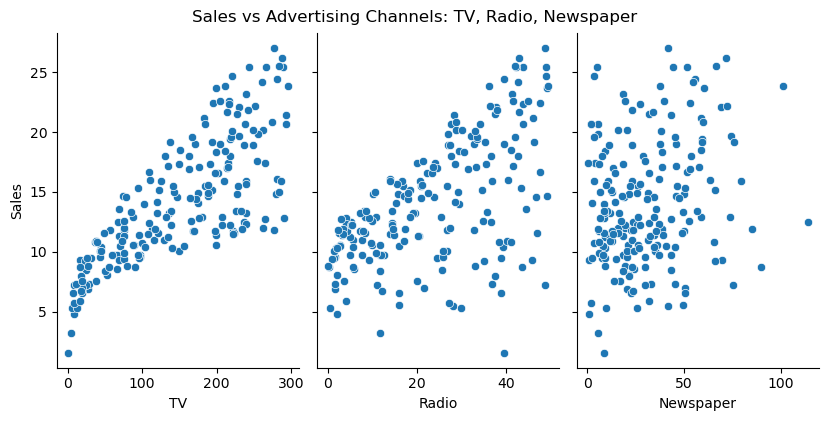

In [13]:
# Visualizing relationship between Sales and Advertising Channel
sns.pairplot(dataset, x_vars=["TV","Radio","Newspaper"], y_vars="Sales", height=4, aspect = 0.7)
plt.suptitle("Sales vs Advertising Channels: TV, Radio, Newspaper", y  = 1.03 )
plt.show()

### Correlation Matrix

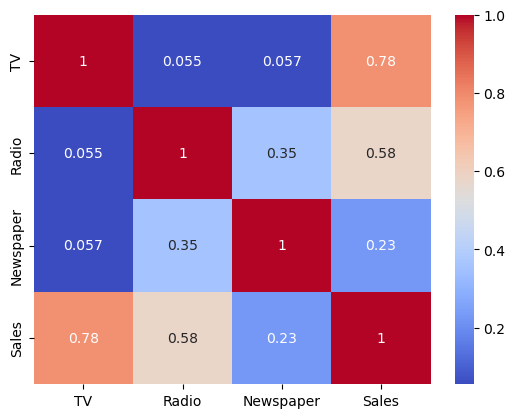

In [15]:
#Correlation Heatmap:  Visualizing relationship between Sales and Advertising Channel
correlation_matrix = dataset[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap = "coolwarm")
plt.show()

#### as we can see from the visualization and coorelation matrix that "TV" has the heighest impact on Sales
##### TTV and Sales correlation: 0.78 (Strong positive correlation)
##### Radio and Sales correlation: 0.58 (Moderate positive correlation)
##### Newspaper and Sales correlation: 0.23 (Weak positive correlation)

## Splittig the Data

In [18]:
#feature selection and Target variable
X = dataset.drop("Sales", axis=1)
y = dataset["Sales"]

# splitting the data into training and testing data
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Model Training

### Linear Regression

In [21]:
#Building Linear regression model and making predictions
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [22]:
#Evaluation of the model
mae_lr = mean_absolute_error(y_test, lr_pred)
r2_lr = r2_score(y_test, lr_pred)

print("Mean Absolute Error: ", mae_lr)
print("R2 Score: ", r2_lr)

Mean Absolute Error:  1.5116692224549084
R2 Score:  0.8609466508230368


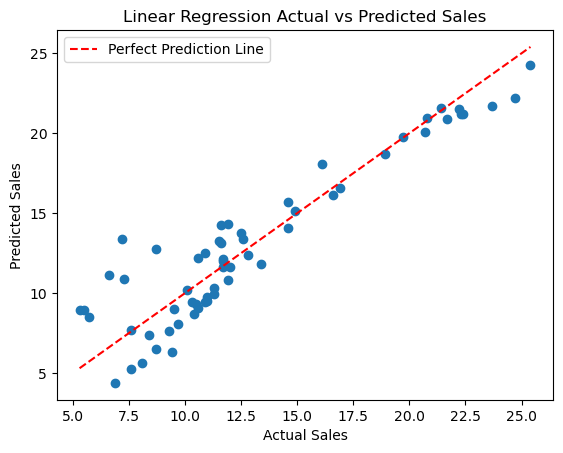

In [23]:
# Visualize the predictions vs actual sales
plt.scatter(y_test, lr_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression Actual vs Predicted Sales')
plt.legend()
plt.show()


### Random Forest Regressor

In [25]:
#Building Random Forest regressor model and making prediction
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

In [27]:
#Evaluation of the model
mae_rf = mean_absolute_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

print("Mean Absolute Error: ", mae_rf)
print("R2 Score: ", r2_rf)

Mean Absolute Error:  0.5685833333333364
R2 Score:  0.9832815019320608


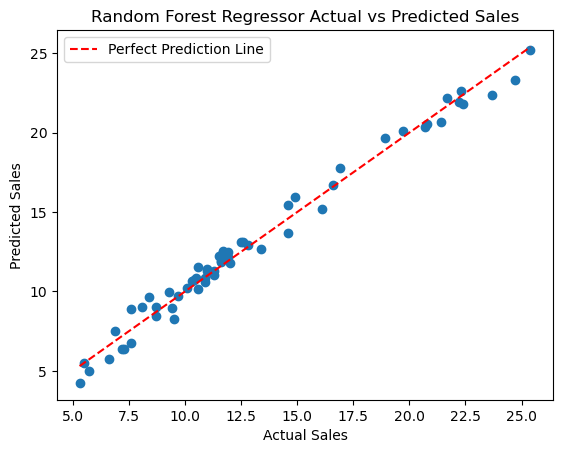

In [28]:
# Visualize the predictions vs actual sales
plt.scatter(y_test, rf_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Random Forest Regressor Actual vs Predicted Sales')
plt.legend()
plt.show()


### Decision Tree Regressor

In [30]:
#Building Decision Tree Regressor model and making prediction
from sklearn.tree import DecisionTreeRegressor


In [31]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

In [32]:
#Evaluation of the Data
mae_dt = mean_absolute_error(y_test, dt_pred)
r2_dt = r2_score(y_test, dt_pred)

print("Mean Absolute Error: ", mae_dt)
print("R2 Score: ", r2_dt)

Mean Absolute Error:  0.9500000000000004
R2 Score:  0.9430865302651902


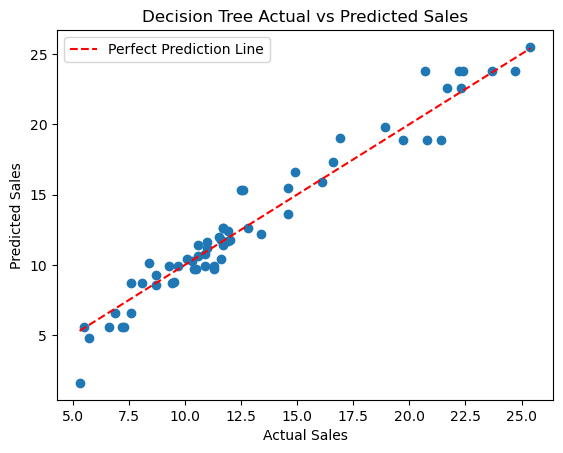

In [33]:
# Visualize the predictions vs actual sales
plt.scatter(y_test, dt_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Decision Tree Actual vs Predicted Sales')
plt.legend()
plt.show()


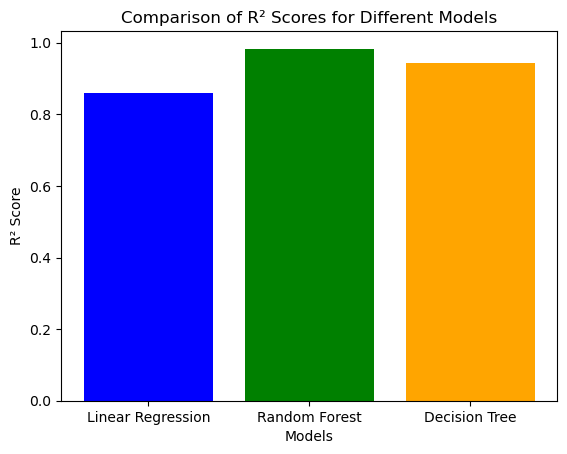

In [34]:
models = [ 'Linear Regression', 'Random Forest','Decision Tree']
r2_values = [r2_lr, r2_rf, r2_dt]

plt.bar(models, r2_values, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Comparison of R² Scores for Different Models')
plt.show()

In this project, we evaluated different models including Linear Regression, Random Forest and Decision Tree to predict sales based on various advertising features. After training and testing the models, we found that the Random Forest model provided the best performance, achieving an R² score of 0.98. This indicates that the Random Forest model is able to explain 98% of the variance in the sales data, making it the most accurate model among those tested.